In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [277]:
# Read in data
df = pd.read_csv('Datasets/practice1.csv')

# Create Month and Day columns
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day

In [279]:
# Only keep the useful data
df = df[['Date', 'Element', 'Data_Value', 'Month', 'Day']]

# Change the data value into C
df['Data_Value'] = df['Data_Value'] / 10

# Sort the dataframe by date
df.sort_values(by='Date', inplace=True)

# Delete the 02-29 date
df = df[~df['Date'].str.contains('02-29')]

# Convert the the Date column into datetime data type
df['Date'] =  pd.to_datetime(df['Date'])

# Separate the time into decade(2005-01-01 to 2014-12-31) and year2015
decade = df[(df['Date'] >= '2005-01-01') & (df['Date'] <= '2014-12-31')]
year_2015 = df[(df['Date'] > '2014-12-31')]

In [281]:
# Max and min temperature
# Decade
decade_max = decade[decade['Element'] == 'TMAX']
decade_min = decade[decade['Element'] == 'TMIN']

# Year - 2015
year_2015_max = year_2015[year_2015['Element'] == 'TMAX']
year_2015_min = year_2015[year_2015['Element'] == 'TMIN']

In [283]:
# Group by the decade the data by the Month and Day columns to find the max and min value
decade_max = decade_max.groupby(['Month', 'Day']).agg({'Data_Value':'max'})
decade_min = decade_min.groupby(['Month', 'Day']).agg({'Data_Value':'min'})

decade_max.reset_index(inplace=True)
decade_min.reset_index(inplace=True)

# Group by the year_2015 by the same columns to find the max and min value
year_2015_max = year_2015_max.groupby(['Month', 'Day']).agg({'Data_Value':'max'})
year_2015_min = year_2015_min.groupby(['Month', 'Day']).agg({'Data_Value':'min'})

year_2015_max.reset_index(inplace=True)
year_2015_min.reset_index(inplace=True)

In [285]:
# Find the the temperature in 2015 that is higher than the decade
year_2015_max = year_2015_max[year_2015_max['Data_Value'] > decade_max['Data_Value']]
year_2015_min = year_2015_min[year_2015_min['Data_Value'] < decade_min['Data_Value']]

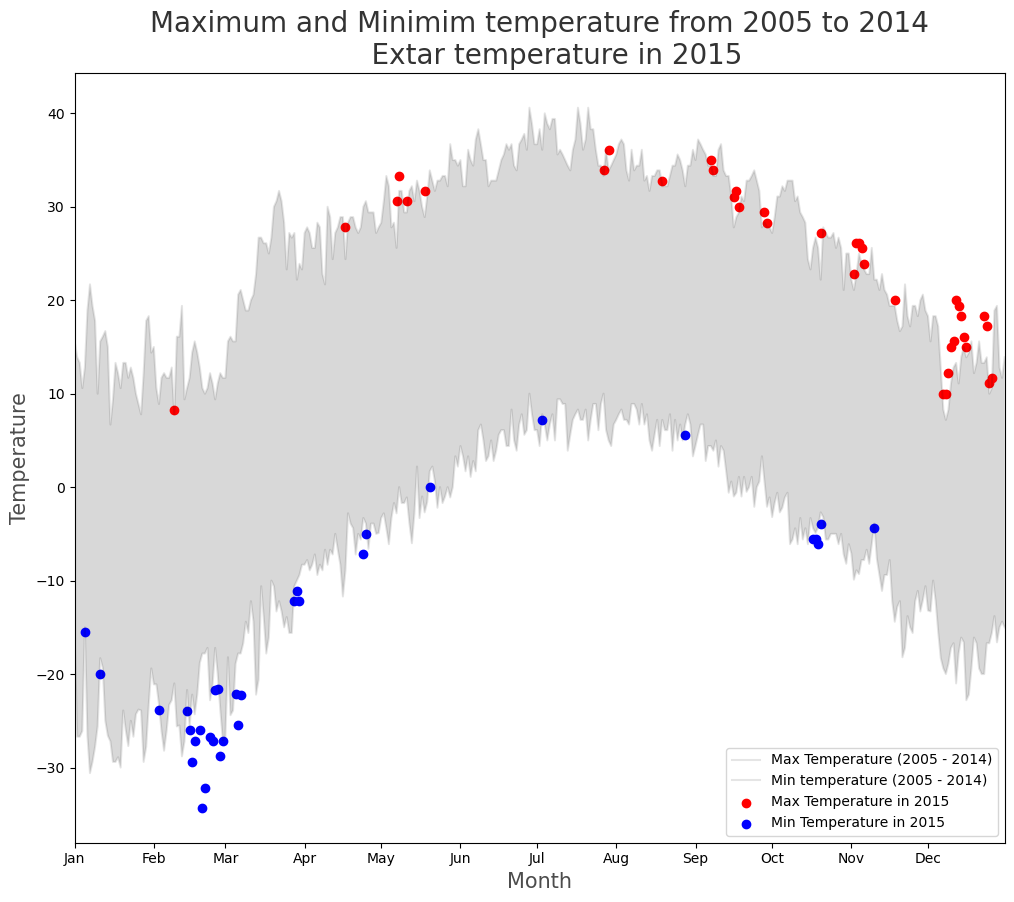

In [297]:
# Plot the figure
plt.figure(figsize=(12,10))

x = decade_max.index
y1 = decade_max['Data_Value']
y2 = decade_min['Data_Value']

a1 = year_2015_max.index
a2 = year_2015_min.index
b1 = year_2015_max['Data_Value']
b2 = year_2015_min['Data_Value']

x_ticks = (pd.date_range('2015-01-01', '2015-12-31', freq='MS').dayofyear) - 1
x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = plt.gca()
ax.set_xlim(0,364)
ax.set_xticks(x_ticks);
ax.set_xticklabels(x_labels)
ax.set_xlabel('Month', fontsize=15, alpha=0.7)
ax.set_ylabel('Temperature', fontsize=15, alpha=0.7)
ax.set_title('''Maximum and Minimim temperature from 2005 to 2014
    Extar temperature in 2015''', fontsize=20, alpha=0.8)

plt.plot(x, y1, c='black', alpha=0.1, label='Max Temperature (2005 - 2014)')
plt.plot(x, y2, c='black', alpha=0.1, label='Min temperature (2005 - 2014)')
ax.fill_between(range(len(x)),
               y1, y2,
               facecolor='gray',
               alpha=0.3)

plt.scatter(a1, b1, color='red', label='Max Temperature in 2015')
plt.scatter(a2, b2, color='blue', label='Min Temperature in 2015')

plt.legend(loc=4);